In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('telecom.csv')

In [10]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

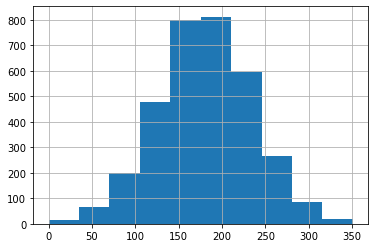

In [12]:
df['total day minutes'].hist();

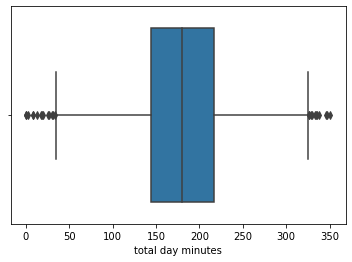

In [14]:
sns.boxplot(df['total day minutes']);

In [34]:
pop_states = df['state'].value_counts().head().index

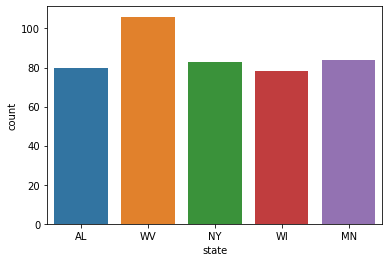

In [39]:
sns.countplot(df[df['state'].isin(pop_states)]['state'])

In [45]:
feat = [i for i in df.columns if i.endswith('charge')]

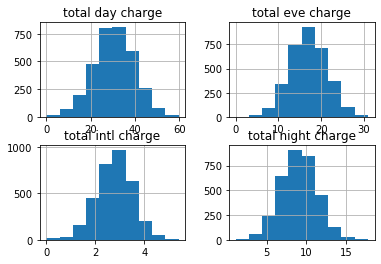

In [47]:
df[feat].hist();

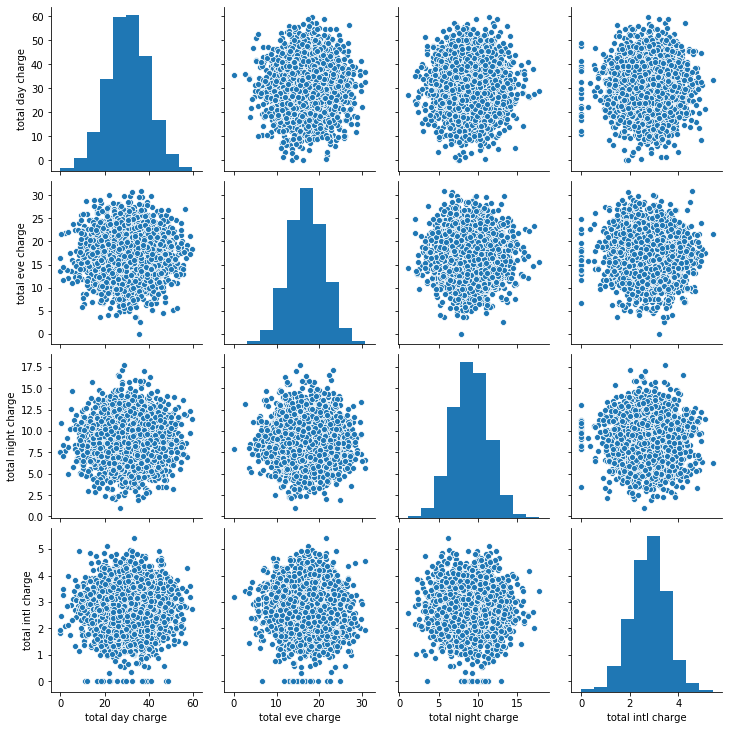

In [48]:
sns.pairplot(df[feat])

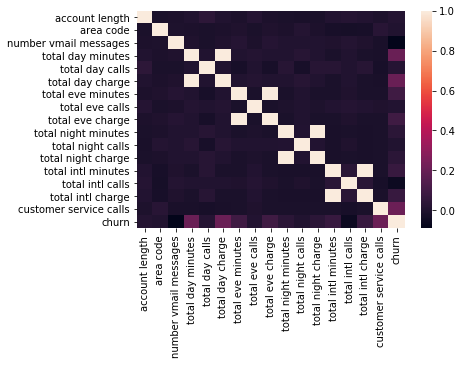

In [49]:
sns.heatmap(df.corr())

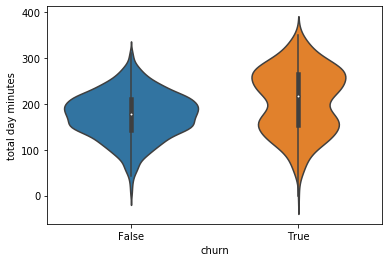

In [58]:
sns.violinplot(x='churn', y='total day minutes', data=df);

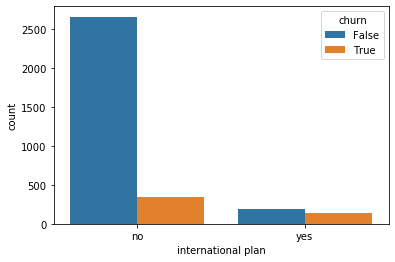

In [71]:
sns.countplot(x='international plan',hue='churn', data=df);

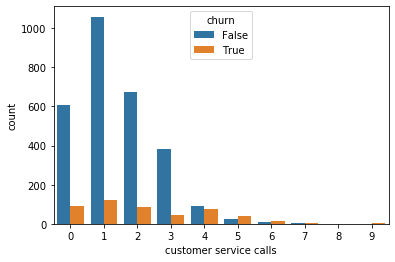

In [73]:
sns.countplot(x='customer service calls',hue='churn', data=df);

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(random_state=0)

In [80]:
df2 = df.drop('state', axis=1)
df2['international plan'] = df2['international plan'].map({"yes": 1, "no": 0})
df2['voice mail plan'] = df2['voice mail plan'].map({"yes": 1, "no": 0})

In [86]:
df2.drop('phone number', axis=1, inplace=True)

In [88]:
tsne.fit(df2)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

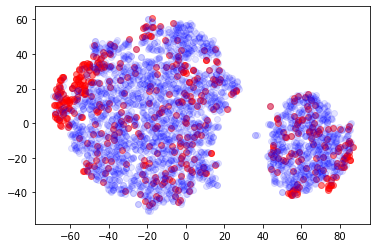

In [100]:
plt.scatter(tsne.embedding_[df2['churn'].values, 0], 
            tsne.embedding_[df2['churn'].values, 1], alpha=.5, color='red');

plt.scatter(tsne.embedding_[~df2['churn'].values, 0], 
            tsne.embedding_[~df2['churn'].values, 1], alpha=.1, color='blue');


In [112]:
# 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711



def fib(n):    
    a, b = 0, 1
    for i in range(n):
        print(a, end=' ')
        a, b = b, a+b
                
fib(100000)


















    
    
    
    
    

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 754011380474634642

95820272820315845425435990825379923684538933707430154725313556468077045074920989144365203966052516227521424978964817384171648017333482850359880439164543689474019983185379834991740064275706465211561471516785562074051203155813274587736085941801603638117566615365695090968481513138179842362824829003056769986 155040458234558783734822601375579921097247976884772905564858112576602864061039375135840982282910195251344075308047993643281329417052814119015888165251567855293669858670578935526090030367012511885220777411620111560894164829882395239066839495658113360990603369757269576299232182424593724733245359835476958831 250860731054874629160258592200959844781786910592203060290171669044679909135960364280206186248962711478865500287012811027452977434386296969375768604416111544767689841855958770517830094642718977096782248928405673634945367985695669826802925437459716999108169985122964667267713695562773567096070188838533728817 40590118928943341289508119357653976587903488747697596585502978162128277319699973

45310833614835122929022250132831528089944902533544139440714661037214228965056842872550859330530162736673372783787948035815457918206086026773577224707992155808794217683017284340359117960666112055585751003824729431638923036471312991874906097885485999244615457097128208296102420366085238101895376510618110201166565053180776247178954459859304486145138717255803890781660179701269122142540683097546580742052189904005207085805938283845414512836894516599380882874919225715600399222077580127078675926096033765257064259410087556947967264681127756300760311391597036367301842976861146370636511356328869052766350140724131556119 7331446884739449061093618738880664332680114779411926930063068115019386185243270659423062099379902488738905975376347956115080038093550997794615269669628962202708657470621411289523303176720313273108336647204037873849225069568113559403844740828037982556769266154176858467627023950858750975913165361033515367597945224258611227094849550939387351784923443020316969702077880570747177693827347

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 823191613979916679806940125675683713593789758705126232365965496197208375612928836129259264425032414855722435384444915518679187898806710317221598359818692281613483454717172472522857142303704993866324229051141021399191811038389278790091520654852975209333409617496425746316110771973153999963785133929658932007736574226498633506518204300451981656516615078890728158890287918296648866556654560460303200568957050296326210736425579294235571371790386933328797791890351458289485114272629280357306911283450620931689402948681445506585645091448097891463358143416811649575448073812103030220989726572914321606693453653786609626793390202117719640528795448433275607327587848790078571790349202008623231274127896839964560613189541750494293105244834089326638488812520417857814196260206413899882510372595711518943768578818352107392205686989865447817594257498159709315542554108259975310061016955621434087293700017253393225868499129853236907966760240793762942750277166438341765989239223416274642440304469572628537113746536

 175024855096856667102546836448880686928360386288409912775787449504428203900350006891473776658809080650277632585606820444814318067911104160104791189181997392275619249644286773752138801773828386733137559843380529245208200591534638167852321748835888593831074302824669462110174157878863389413202508319607529101429008535895172836234937654658925958794865212255220297718374158278293047258585329386629751500955008309812754575703648645278927981438039786569000059656711286190206546669190067676562950428800825943559019564971179860327117365948706117232092823401728254724649063578694819894678111275453742590176858848510425347067351103644182981878637823705798741301373291397804373470042145892073398022550565185178534418452010342352770054596395441348591787652065947018444753018740332534427689158008366253074277254884666622161012573558837007038371324886105086869163807452595926325445784034167250649917280640312929841199766265097914461946652606099106580313318487379263393438564194897801754925418638872551819915015309

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 145520984814748905725756461660368238504637893920915388177744994505090868526275636242674479434684943181101990901743329522520305662408885549739073144160575765544530915743841739661094763172758338619543268512075715324912436713426736080809900017145370035867638931085172897553460475211739579716345447239443087769114040984016783668773966867065905431737340413621884928347226365382424164236396604492469891446169556952207484816989194287495042811008484007585956993404649085935803581182113831826767433438761281181541470556723830640228694428505755007895912085177892500263992604693798282935844590918482449329325005770844536460800579135896575837249576385824622901333188832639856375663701644440648289547750920836511150574420892152383946878576680776296892118704904388488000423999377557768282187738219788589318826741802036232655668693298129676194650794388998790338424779120947751659157133185454158394172446440277101441649164321917222898874260851139394071714050431615476872270466808594577993854445448700037855101789342

 143906941439099472313835744163705458362814142818011088193112873322734329241459979001594369545059051799421894077101095342679283719308607905231689838970011645362307644926589471867915271759095959268792517189161762224997404099975774840061890911223143771215328444156916465597688781109812822043535211906774988671216220566937182088715226417544487922170653225912434457044779264425302156569692958915647986462732531555927774750681570638533272673556112799904343966542487403868638210695889565687138791549427835959259016130158728480866414223664350156786004231523346494936687741169794377934595420747338098831800516947512881787797416498656313263170103035846344197257707943887770034532681798431878796525152099107779699652158374857069752155576870207650319519084175539719073727482815172317376288616846519929999995122775255336714846589263150597337145100516512292246957716886305227587105103596083078627593283260505977439101468891305057215363199368093422428052137357239081532611502935495341981526122511884756373938886399

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 186431925501813315585842976488242007847685193234888140258377377349243064244531388774036362613768714250402538214441463496050129965264941974873066301448084262224219441113627187328296020968001958191981012919368438483644423174029606310958122449857559687034987056390516251663016607153710177181321181850577327557605987628837322356390091368640219769926687774165978625962916227671484072879721534336990087956943629201032076665093671264582444126022522410883960061793705440538531998179211476314819054990546994555802184718755732069517414173973885351704892649743107916472456976853690217394435506425245080622394965796833753360950996463140989900928475219525633443930800178689756971796514641976468615146538320885468559326905974350092289087444213621238915659525267970734696323618323353664335659399096264102532219715390979445884913277495311411075521432880042417534725306546338727924620783155357012221117332449840344541204555093731149459241211854853314267674899888765838031229411376658379816224767864613411949104941610

KeyboardInterrupt: 